## Hierarchical Clustering ( Mall Customers Dataset)

In [1]:
import numpy as np # linear algebra
import pandas as pd 

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.shape

(200, 5)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


We take only two Features (Annual Income and Spending Score) to classify customer type.

In [7]:
X = dataset.iloc[:, 3:]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [8]:
import scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 15, 10

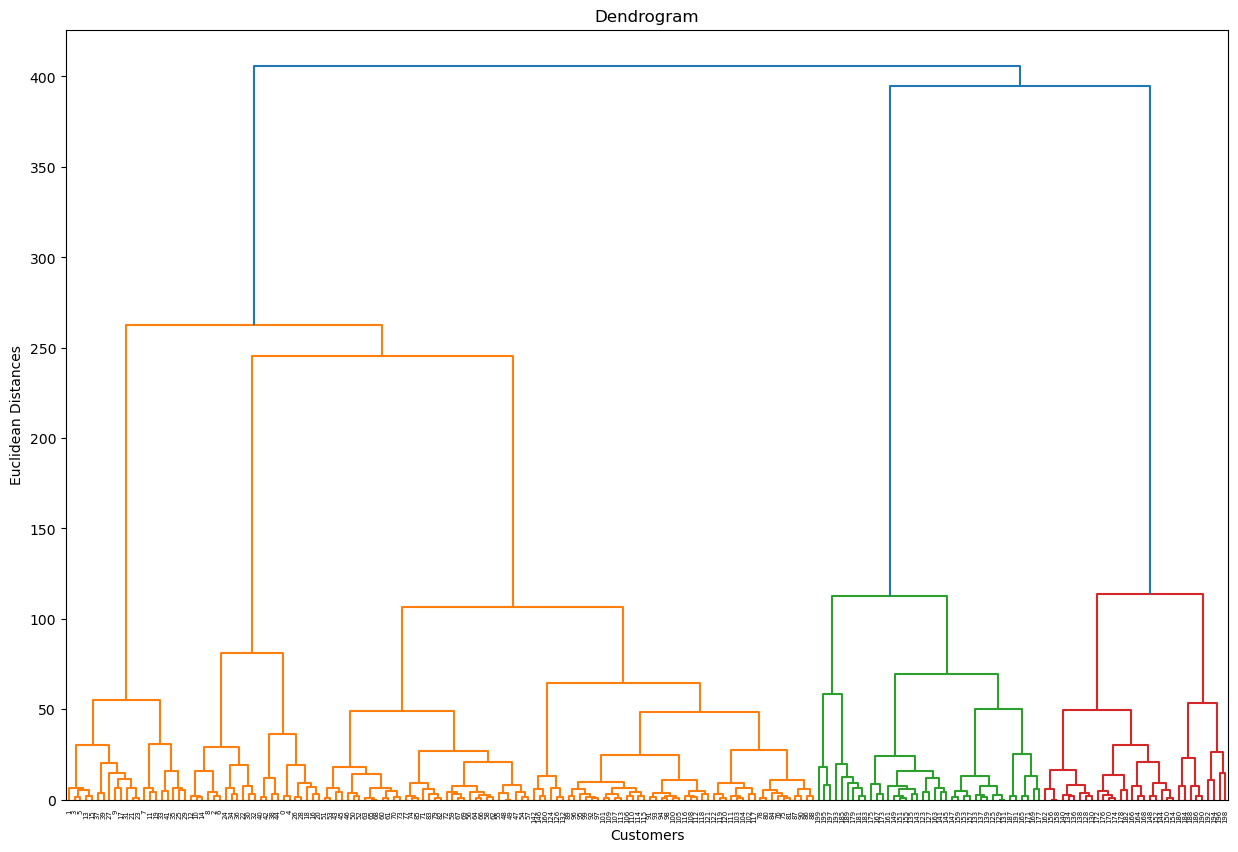

In [9]:
# Using Dendogram to find the optimal number of clusters
dendogram  = hc.dendrogram(hc.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

### Dendrogram
Dendrogram is a graphical representation of Hierarchical Clustering. More the vertical length of line in dendogram, more the distance between the clusters. dendogram is help in finding the number of clusters. We set a threshold distance and draw a horizontal line.Then the number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.

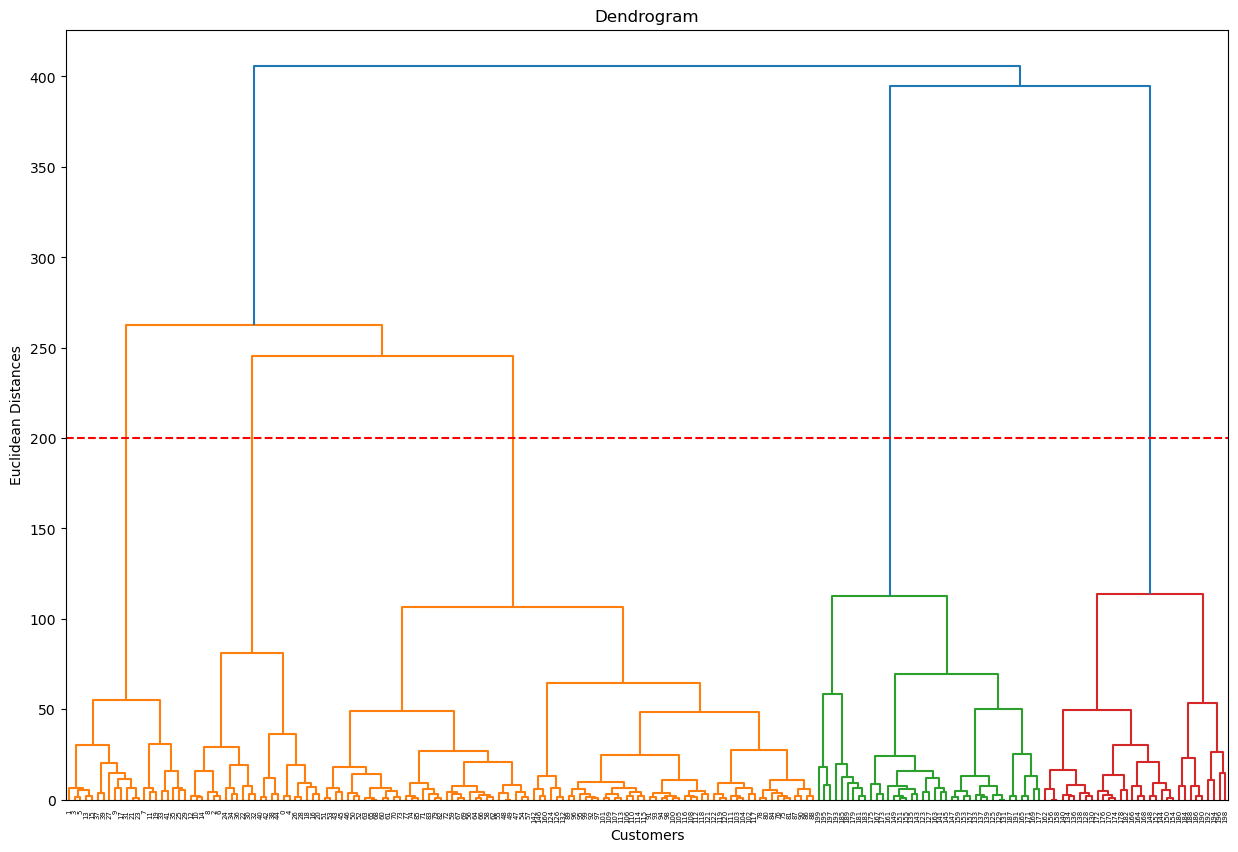

In [10]:
dendogram  = hc.dendrogram(hc.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(200, c='r', linestyle='--')
plt.show()

**Here's the number of Cluster is (n_clusters) = 5**

In [11]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc_Agg = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc_Agg.fit_predict(X)

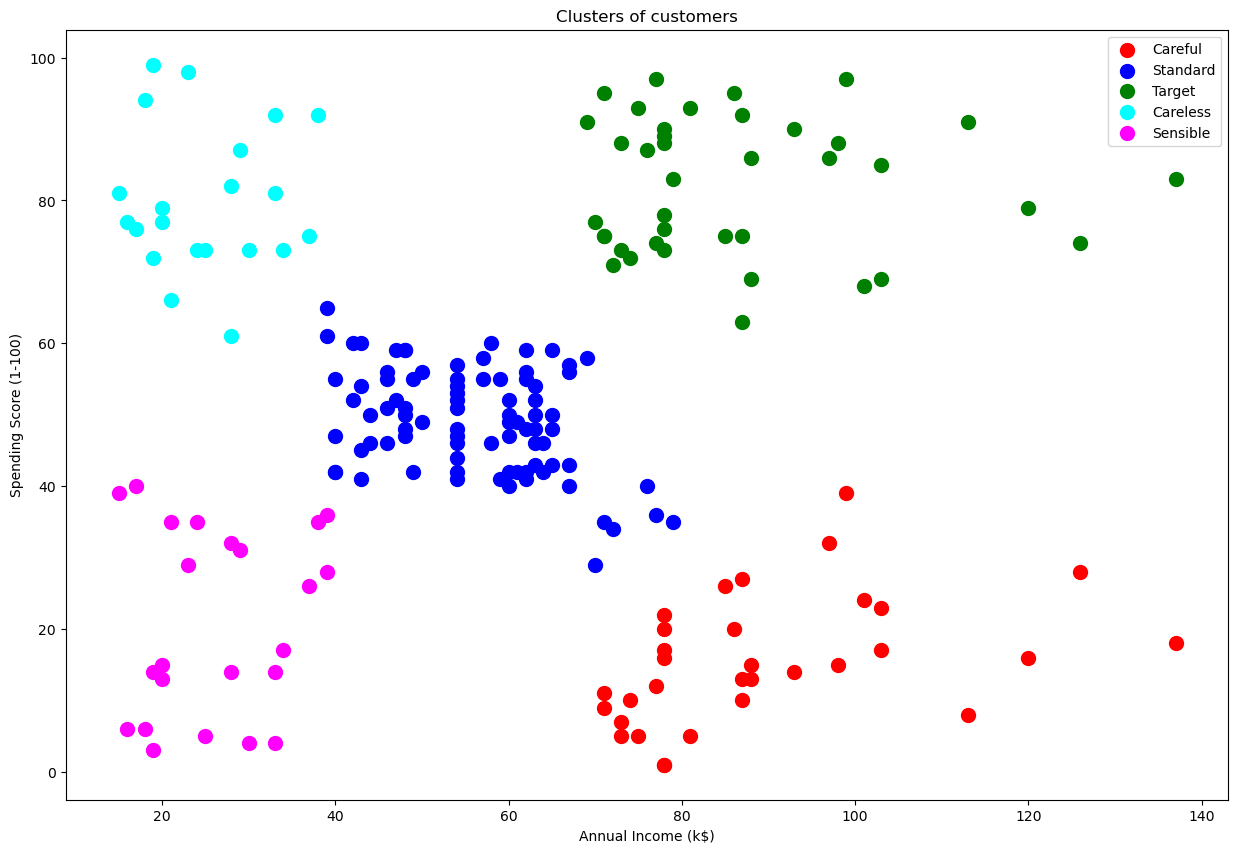

In [12]:
# Visualizing the clusters
plt.scatter(X.iloc[y_hc == 0, 0], X.iloc[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X.iloc[y_hc == 1, 0], X.iloc[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X.iloc[y_hc == 2, 0], X.iloc[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X.iloc[y_hc == 3, 0], X.iloc[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X.iloc[y_hc == 4, 0], X.iloc[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In 90% Cases Result of Both hierarchical clustering technique is same.

##### Pros :
The Optimal number of clusters can be obtained by the model itself, practical visualisation with the dendrogram

##### Cons :
It is Not Appropriate for Datasets that have large number of Records.